### Project 7 

There are many flight journey made everyday around the world. In order to provide an excellent travelling experience to the customers, airlines need to ensure their operations are smooth and of good quality. One of the key metrics in determining the quality of an operator is its on-time performance. There are many factors that can affect a flight's on time performace such as weather, emergency maintenance and even the delaying of previous flights. Therefore the analysis of aircraft delays are always of interest in the perspectives of operators.

The aim of this project is to deepen the understanding of aircraft or airport delays delays. More specifically it is aim to find out whether all airports behave similarly or are there special ones that worths looking further into.

Success criteria: Identify airports that are significantly different from others


#### Step 1: Load the python libraries that you will need for this project 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import psycopg2 as psy
from sqlalchemy import create_engine
%matplotlib inline


#### Step 2: Examine your data 

In [25]:
df_airport_cancellations = pd.read_csv("../assets/airport_cancellations.csv")
df_airport_operations = pd.read_csv('../assets/Airport_operations.csv')
df_airport = pd.read_csv('../assets/airports.csv')
df_airport_cancellations = df_airport_cancellations.dropna() 
df_airport_cancellations.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [26]:
df_airport_cancellations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 804
Data columns (total 6 columns):
Airport                    805 non-null object
Year                       805 non-null float64
Departure Cancellations    805 non-null float64
Arrival Cancellations      805 non-null float64
Departure Diversions       805 non-null float64
Arrival Diversions         805 non-null float64
dtypes: float64(5), object(1)
memory usage: 44.0+ KB


In [20]:
aplist = np.unique(df_airport_cancellations.Airport)
len(aplist)

74

In [19]:
df_airport[df_airport.LocID.isin(aplist)]

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
10,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes
20,976.0,OGG,KAHULUI,Kahului Airport,Airport,AWP,MAUI,KAHULUI,HI,Federalized/Commercial,20.898650,-156.430458,Yes
24,975.0,HNL,HONOLULU INTL,Honolulu Int'l Airport,Airport,AWP,HONOLULU,HONOLULU,HI,Federalized/Commercial,21.318681,-157.922429,Yes
33,825.0,MIA,MIAMI INTL,Miami Int'l Airport,Airport,ASO,DADE,MIAMI,FL,Federalized/Commercial,25.795361,-80.290111,Yes
40,801.0,FLL,FORT LAUDERDALE/HOLLYWOOD INTL,Ft Lauderdale/Hollywood Int'l Arpt,Airport,ASO,BROWARD,FORT LAUDERDALE,FL,Federalized/Commercial,26.072596,-80.152741,Yes
53,857.0,RSW,SOUTHWEST FLORIDA INTL,Southwest Florida Int'l Airport,Airport,ASO,LEE,FORT MYERS,FL,Federalized/Commercial,26.536167,-81.755167,Yes
57,843.0,PBI,PALM BEACH INTL,Palm Beach Int'l Airport,Airport,ASO,PALM BEACH,WEST PALM BEACH,FL,Federalized/Commercial,26.683167,-80.095583,Yes
103,864.0,TPA,TAMPA INTL,Tampa Int'l Airport,Airport,ASO,HILLSBOROUGH,TAMPA,FL,Federalized/Commercial,27.975472,-82.533250,Yes
122,836.0,MCO,ORLANDO INTL,Orlando Int'l Airport,Airport,ASO,ORANGE,ORLANDO,FL,Federalized/Commercial,28.429394,-81.308993,Yes
194,3297.0,SAT,SAN ANTONIO INTL,San Antonio Int'l Airport,Airport,ASW,BEXAR,SAN ANTONIO,TX,Federalized/Commercial,29.533694,-98.469778,Yes


In [6]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 13 columns):
Key                        5164 non-null float64
LocID                      5152 non-null object
AP_NAME                    5164 non-null object
ALIAS                      3498 non-null object
Facility Type              5164 non-null object
FAA REGION                 5164 non-null object
COUNTY                     5164 non-null object
CITY                       5164 non-null object
STATE                      5164 non-null object
AP Type                    5164 non-null object
Latitude                   5164 non-null float64
Longitude                  5164 non-null float64
Boundary Data Available    5164 non-null object
dtypes: float64(3), object(10)
memory usage: 524.8+ KB


In [21]:
df_airport_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

In [24]:
len(np.unique(df_airport_operations.airport))

77

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [3]:
engine_local = create_engine('postgresql://localhost:5432')
conn = engine_local.connect()
conn.execute("commit")
conn.execute("CREATE DATABASE FAA")
conn.close()

ProgrammingError: (psycopg2.ProgrammingError) database "faa" already exists
 [SQL: 'CREATE DATABASE FAA']

In [4]:
engine_FAA = create_engine('postgresql://localhost/faa')
df_airport_cancellations.to_sql('airport_cancellation',engine_FAA,index=False)
df_airport.to_sql('airport',engine_FAA,index=False)
df_airport_operations.to_sql('airport_operations',engine_FAA,index=False)

NameError: name 'df_airport_cancellations' is not defined

Join airport_cancellations.csv and airports.csv into one table

In [32]:
%load_ext sql


In [50]:
%%sql postgresql://localhost:5432/faa
SELECT * FROM airport_cancellation ac JOIN airport a on ac."Airport" = a."LocID"

805 rows affected.


Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
ABQ,2004.0,242.0,235.0,71.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2005.0,221.0,190.0,61.0,33.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2006.0,392.0,329.0,71.0,124.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2007.0,366.0,304.0,107.0,45.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2008.0,333.0,300.0,79.0,42.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2009.0,192.0,162.0,74.0,26.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2010.0,222.0,177.0,71.0,50.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2011.0,345.0,294.0,77.0,61.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2012.0,237.0,181.0,65.0,60.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
ABQ,2013.0,232.0,212.0,62.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


In [51]:
df = pd.DataFrame(_,columns=_.field_names)
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004.0,242.0,235.0,71.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005.0,221.0,190.0,61.0,33.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006.0,392.0,329.0,71.0,124.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
3,ABQ,2007.0,366.0,304.0,107.0,45.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
4,ABQ,2008.0,333.0,300.0,79.0,42.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


#### 1.2 What are the risks and assumptions of our data? 

The shape of the datasets are very different. The airport dataset has got more airports comparing to the other two. It has also got missing values where the other two are rather complete. assumption of our data is that there are no silly values as we don't have the domain knowledge and using the info() method we find out there are no outrageously values that differ from either the mean or median. We also not know whether there are data entry errors. However with proper EDA again we can lower this risk to a minimal.

### Part 2: Exploratory Data Analysis

Query the database for our intial data

In [2]:
engine_FAA = create_engine('postgresql://localhost/faa')
ap_cancel = pd.read_sql('airport_cancellation',engine_FAA)
ap = pd.read_sql('airport',engine_FAA)
ap_ops = pd.read_sql('airport_operations',engine_FAA)

#### 2.1 Plot and Describe the Data

In [3]:
ap.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


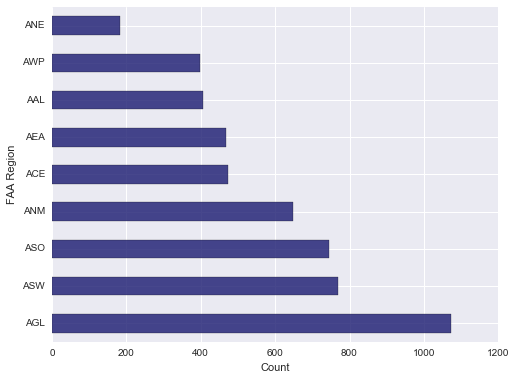

In [4]:
plt.figure()
ax = plt.subplot()
ap['FAA REGION'].value_counts().plot(kind='barh', figsize=(8,6), ax=ax, color='midnightblue', alpha=.8)
ax.set(xlabel='Count',ylabel='FAA Region')
plt.show()

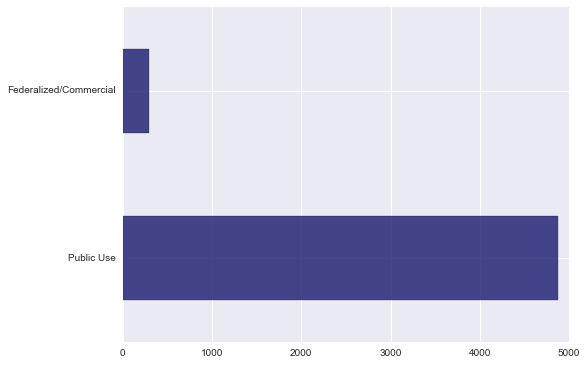

In [5]:
ap['AP Type'].value_counts().plot(kind='barh',color='midnightblue',alpha=.8,figsize=(8,6))
plt.show()

#### Are there any unique values? 

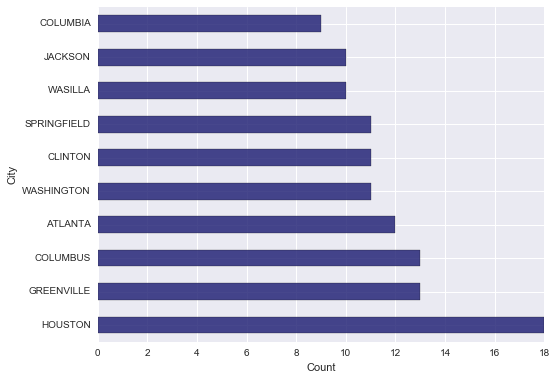

In [9]:
plt.figure()
ax = plt.subplot()
ap['CITY'].value_counts()[:10].plot(kind='barh',color='midnightblue',alpha=.8,figsize=(8,6),ax=ax)
ax.set(xlabel='Count',ylabel='City')
plt.show()

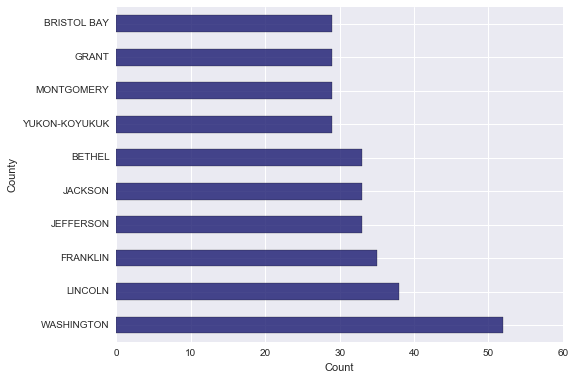

In [10]:
plt.figure()
ax = plt.subplot()
ap['COUNTY'].value_counts()[:10].plot(kind='barh',color='midnightblue',alpha=.8,figsize=(8,6),ax=ax)
ax.set(xlabel='Count',ylabel='County')
plt.show()

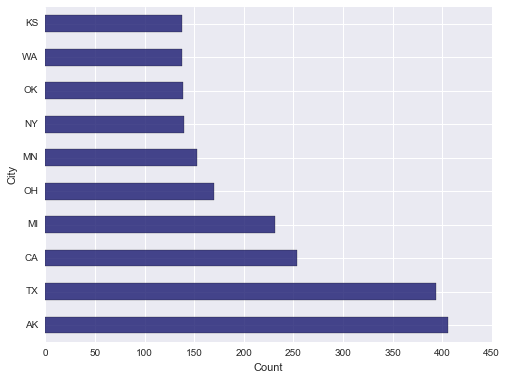

In [11]:
plt.figure()
ax = plt.subplot()
ap['STATE'].value_counts()[:10].plot(kind='barh',color='midnightblue',alpha=.8,figsize=(8,6),ax=ax)
ax.set(xlabel='Count',ylabel='City')
plt.show()

In [12]:
ap_cancel.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


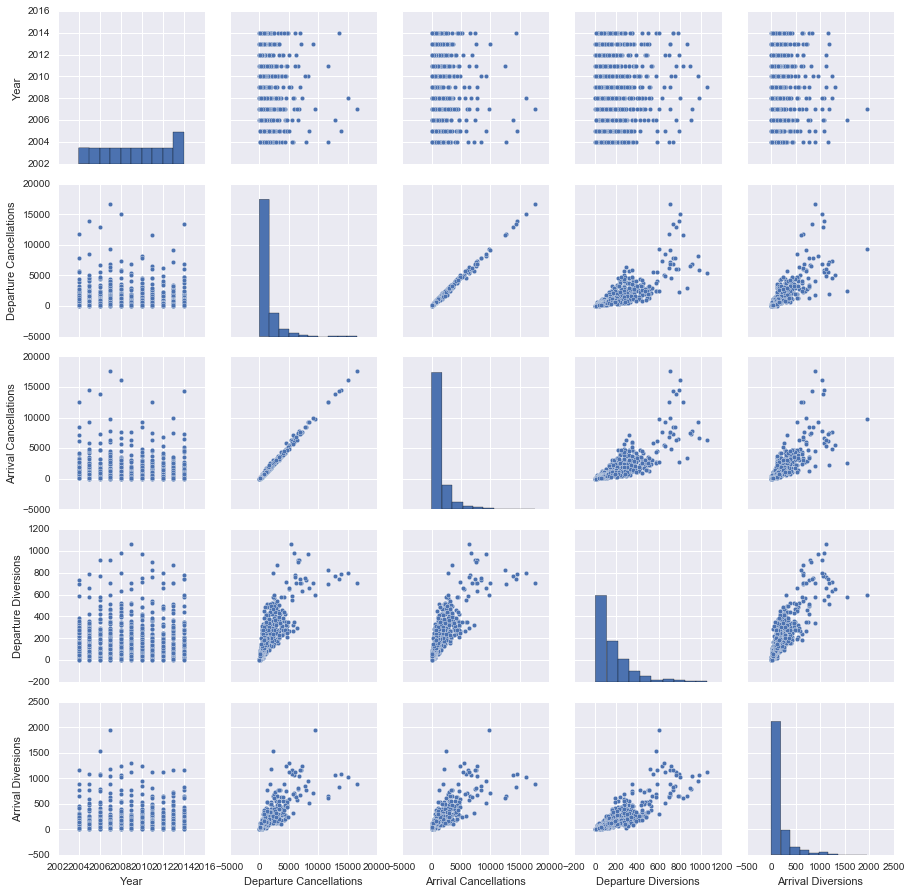

In [13]:
sns.pairplot(ap_cancel.iloc[:,1:])

From the plots above it is not able to immediately tell where clusters might appear. The best guess would be clusters around near the origin for most scatter plots and other clusters as the data magnitude gets larger.

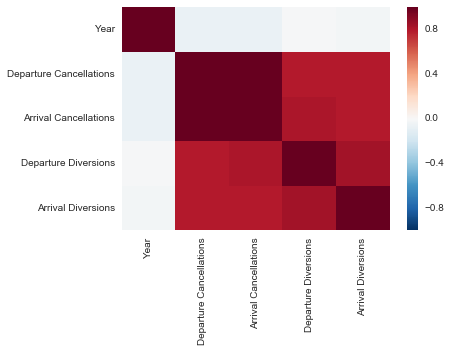

In [14]:
sns.heatmap(ap_cancel.iloc[:,1:].corr())

In [15]:
ap_ops.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


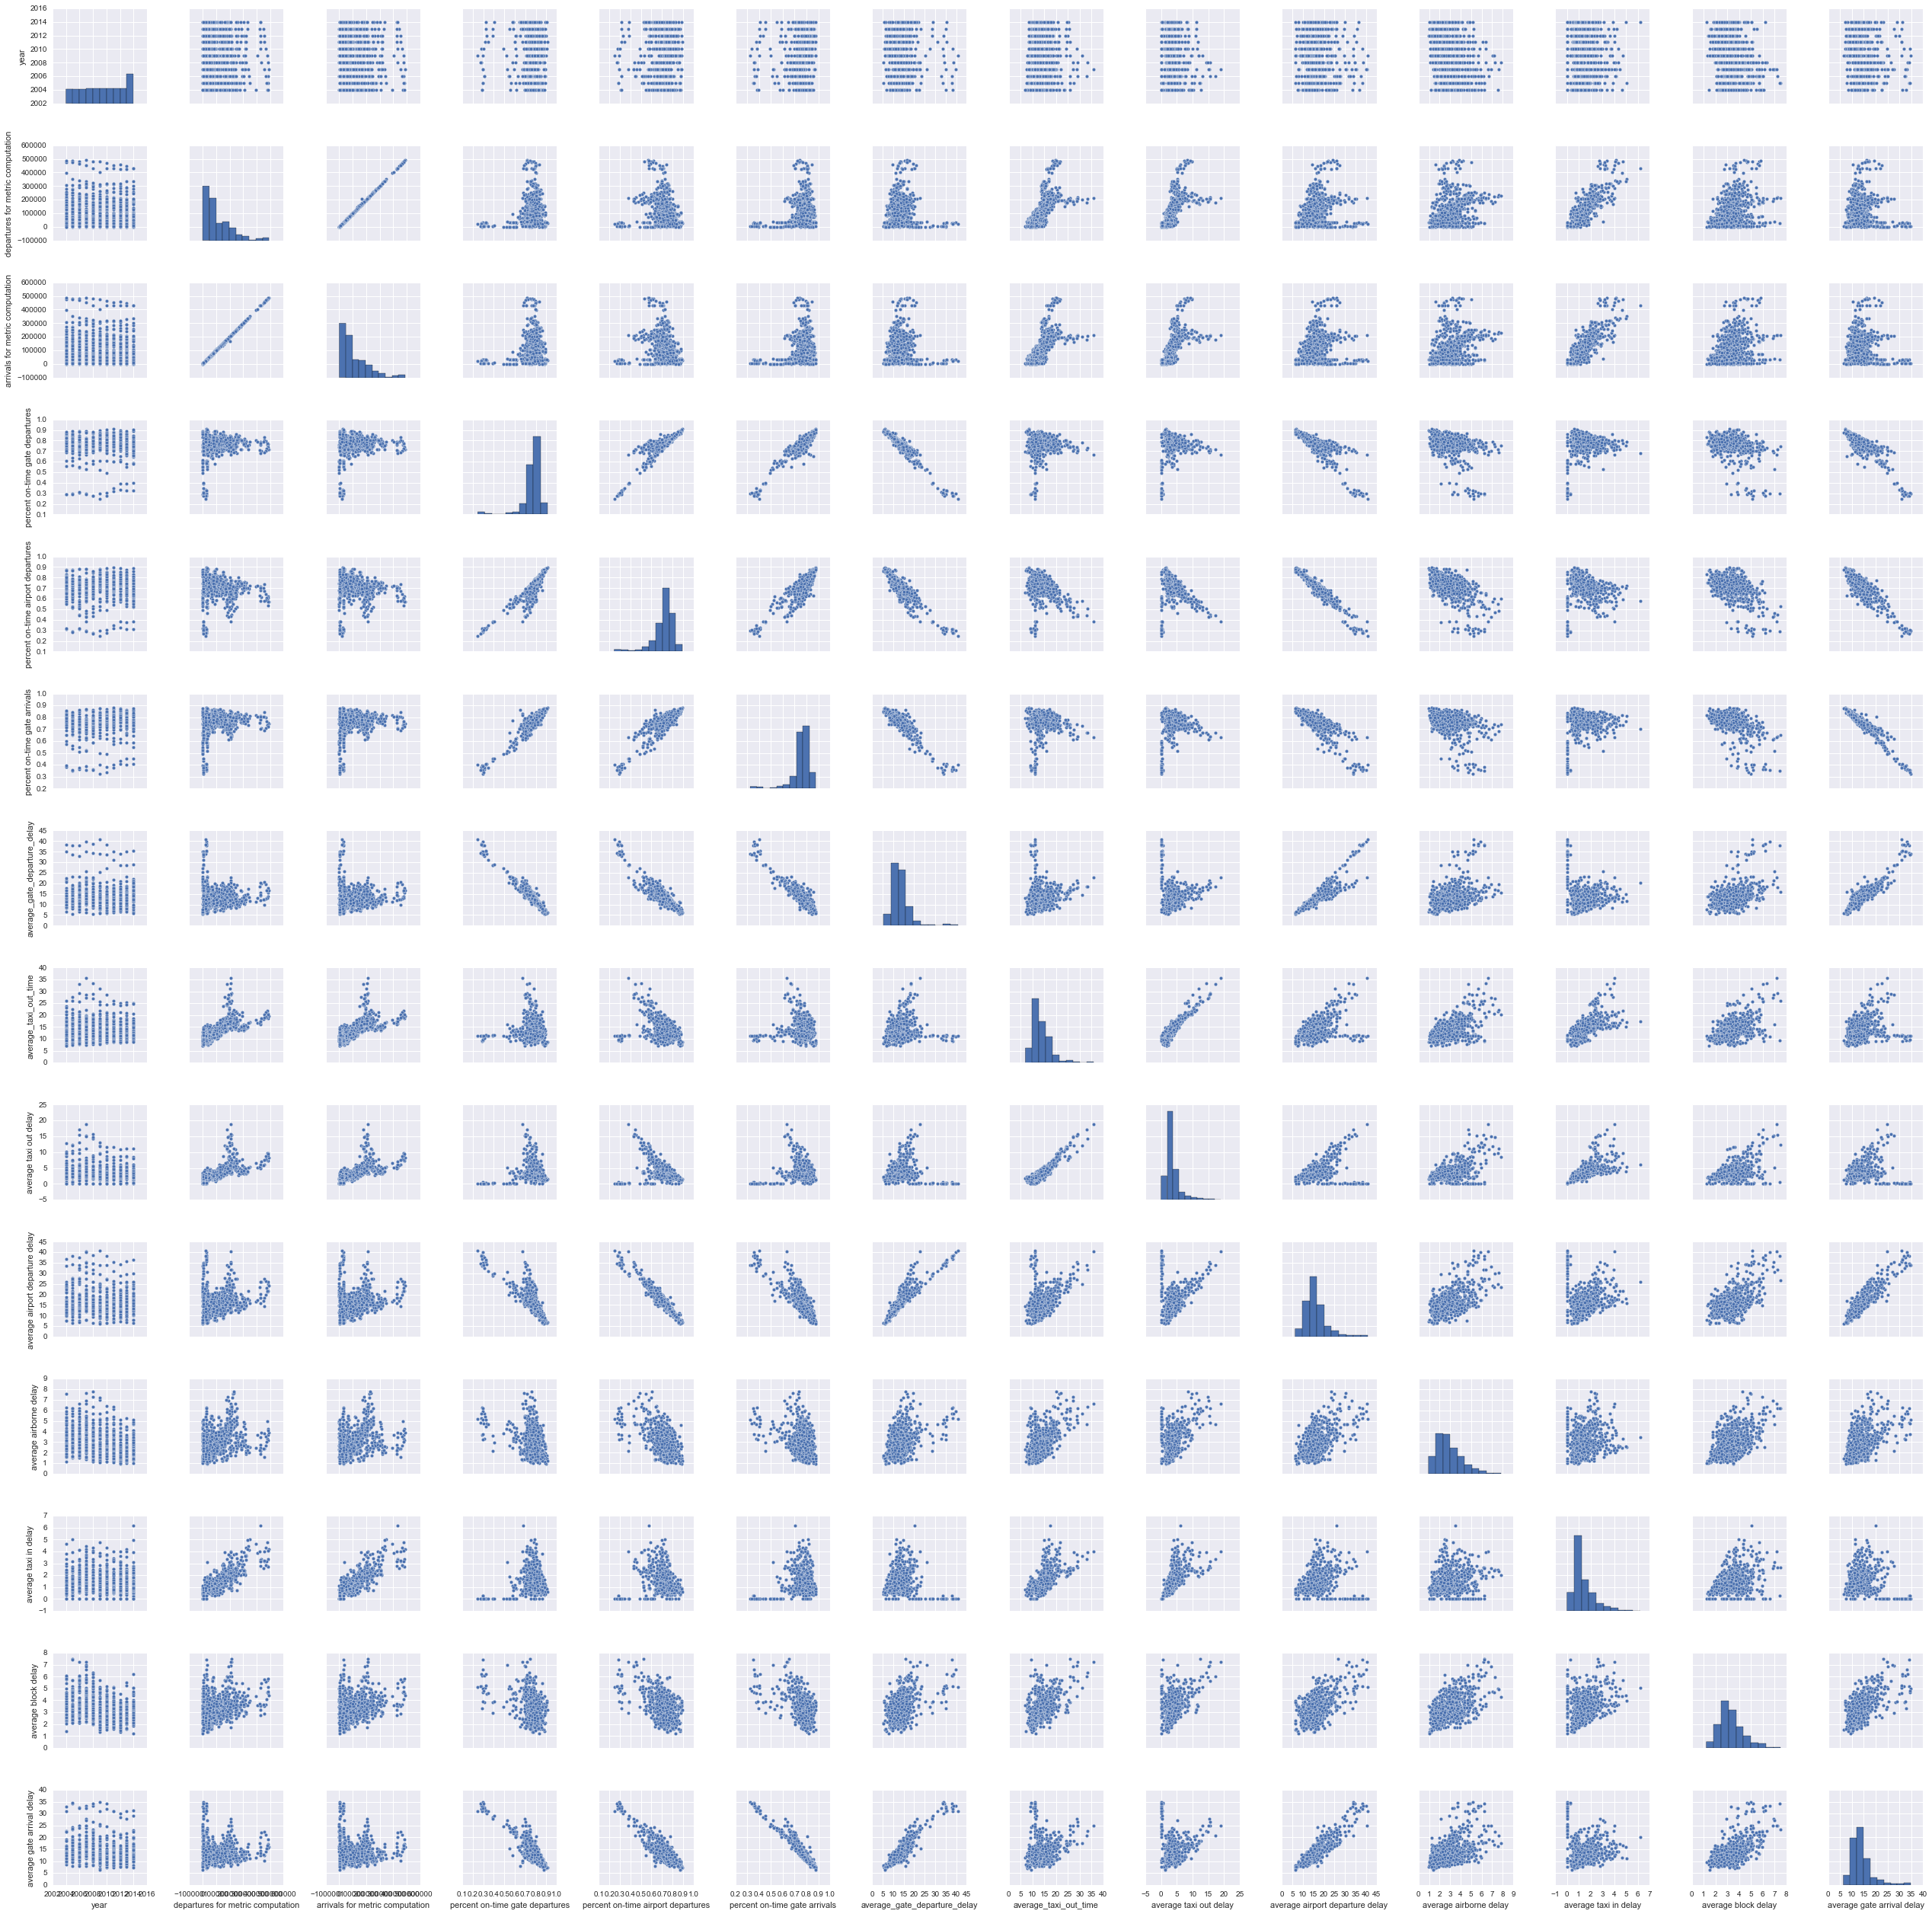

In [16]:
sns.pairplot(ap_ops.iloc[:,1:])
plt.show()

### Pairplot summary

From the pairplot above many many correlated factors can be observed. As expected the all the delay variables shows positive correlation between each other and negative correlations with the on-time variables. It can be said that all the procdure on time-performance are correlated with each other.

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [3]:
# Since operations can cancellation data are of numerical types, most dummies would come from the airport dataset
ap.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [4]:
# Looking at the above dataframe, there are a few columns that needs to be dropped.
# Need to keep LocID for joining others can be turned into categorical data apart from lat and long
ap_d = ap.drop(['Key', 'AP_NAME', 'ALIAS', 'Facility Type','Boundary Data Available'],axis=1)
ap_d.head()

,LocID,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude
0,STX,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722
1,X64,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330
2,PSE,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028
3,VQS,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617
4,X63,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718


In [6]:
faaregion = pd.get_dummies(ap_d['FAA REGION'],drop_first=True)
county = pd.get_dummies(ap_d['COUNTY'],drop_first=True)
city = pd.get_dummies(ap_d['CITY'],drop_first=True)
state = pd.get_dummies(ap_d['STATE'],drop_first=True)
aptype = pd.get_dummies(ap_d['AP Type'],drop_first=True)
ap_d.drop(['FAA REGION', 'COUNTY', 'CITY', 'STATE','AP Type'],axis=1,inplace=True)
ap_dc = pd.concat([ap_d,faaregion,county,city,state,aptype],axis=1)

#### 3.2 Format and Clean the Data

In [7]:
ap_dc['Airport'] = ap_dc['LocID']
ap_dc.drop('LocID',axis=1,inplace=True)
ap_dc.head()

,Latitude,Longitude,ACE,AEA,AGL,ANE,ANM,ASO,ASW,AWP,...,UT,VA,VI,VT,WA,WI,WV,WY,Public Use,Airport
0,17.701556,-64.801722,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,STX
1,17.982189,-66.019330,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,X64
2,18.008306,-66.563028,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,PSE
3,18.134811,-65.493617,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,VQS
4,18.138017,-65.800718,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,X63


In [8]:
ap_ops['Airport'] = ap_ops['airport']
ap_ops['Year'] = ap_ops['year']
ap_ops.drop(['airport','year'],axis=1,inplace=True)
ap_ops.head()

,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Airport,Year
0,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,ABQ,2004
1,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,ABQ,2005
2,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,ABQ,2006
3,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,ABQ,2007
4,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,ABQ,2008


### Part 4: Define the Data

In [9]:
ap_merge = ap_ops.merge(ap_cancel,on=['Year','Airport'], how='inner')
ap_merge = ap_merge.merge(ap_dc,on=['Airport'],how='inner')
ap_merge.head()

,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,...,TX,UT,VA,VI,VT,WA,WI,WV,WY,Public Use
0,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,...,0,0,0,0,0,0,0,0,0,0
1,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,...,0,0,0,0,0,0,0,0,0,0
2,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,...,0,0,0,0,0,0,0,0,0,0
3,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,...,0,0,0,0,0,0,0,0,0,0
4,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,...,0,0,0,0,0,0,0,0,0,0


In [17]:
ap_merge.isnull().values.any()

False

#### 4.2 Find correlations in the data

In [19]:
ap_merge.corr().head()

,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,...,TX,UT,VA,VI,VT,WA,WI,WV,WY,Public Use
departures for metric computation,1.000000,0.999807,-0.063251,-0.399942,0.103680,0.131396,0.638656,0.604125,0.391838,0.401505,...,0.074869,0.050492,NaN,NaN,NaN,0.057858,-0.053163,NaN,NaN,-0.020556
arrivals for metric computation,0.999807,1.000000,-0.062713,-0.399040,0.104228,0.129871,0.636674,0.603439,0.390470,0.400179,...,0.075847,0.046285,NaN,NaN,NaN,0.058587,-0.052778,NaN,NaN,-0.021347
percent on-time gate departures,-0.063251,-0.062713,1.000000,0.818598,0.782703,-0.913107,-0.169598,-0.212539,-0.764464,-0.265446,...,-0.097019,0.131974,NaN,NaN,NaN,0.130082,-0.037653,NaN,NaN,0.168048
percent on-time airport departures,-0.399942,-0.399040,0.818598,1.000000,0.695697,-0.826633,-0.653223,-0.725766,-0.954832,-0.558150,...,-0.027328,0.047240,NaN,NaN,NaN,0.107971,-0.001136,NaN,NaN,0.120167
percent on-time gate arrivals,0.103680,0.104228,0.782703,0.695697,1.000000,-0.800603,-0.230311,-0.287357,-0.712975,-0.271240,...,0.009781,0.137054,NaN,NaN,NaN,0.103109,-0.048332,NaN,NaN,0.132126


#### 4.3 What is the value of understanding correlations before PCA? 

Answer: Since PCA is a combination of different variables it is not possible to interpret. Therefore it would be nice to see correlations before the PCA is performed. PCA is valuable as not all features are equally informative. it would be beneficial interms of analysis to pick out the most informative ones (ones with most variacne explained) to run analysis on as this reduces dimension of data hence reudces computation time.

#### 4.4 Validate your findings using statistical analysis

In [141]:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.cm as cm

clus = KMeans(n_clusters=2)
clus.fit(ap_merge.drop('Airport',axis=1))
labels = clus.labels_



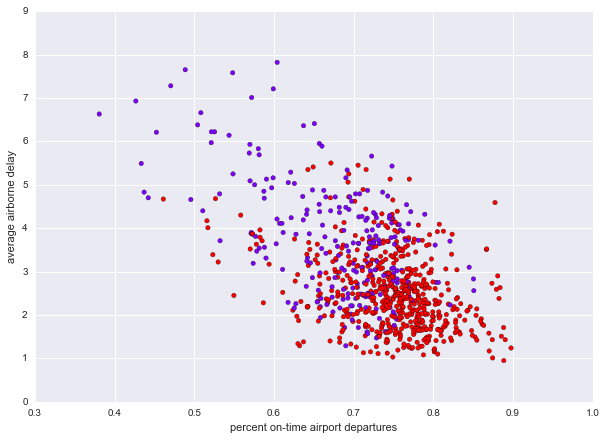

In [142]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(ap_merge['percent on-time airport departures'],ap_merge['average airborne delay'],c=labels, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='percent on-time airport departures', ylabel='average airborne delay')
plt.show()

In [143]:
from sklearn.metrics import silhouette_score
silhouette_score(ap_merge.drop('Airport',axis=1), clus.labels_, metric='euclidean')

0.6648982112574654

From the plot above we can vaguely tell that the clusters could seperate those airports with visualised in % on time departures and average airborne delay (Top left cluster and lower right cluster)

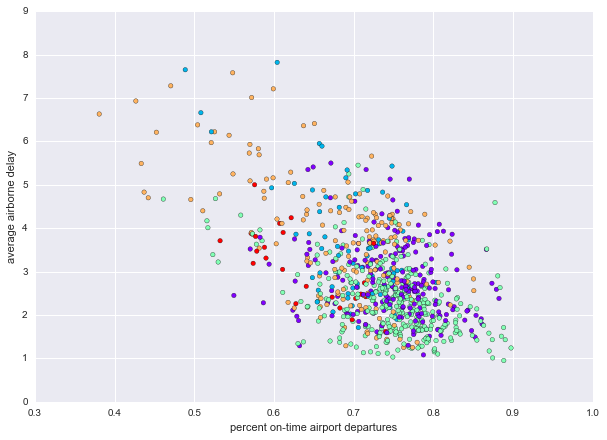

In [36]:
clus = KMeans(n_clusters=5)
clus.fit(ap_merge.drop('Airport',axis=1))
labels = clus.labels_
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(ap_merge['percent on-time airport departures'],ap_merge['average airborne delay'],c=labels, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='percent on-time airport departures', ylabel='average airborne delay')
plt.show()

However as we increase the number of clusters the clarity reduces significantly with only the purple group being merely recognisable

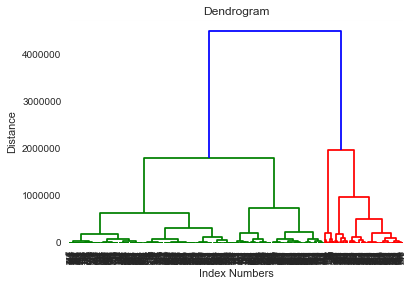

In [34]:
ap_X = ap_merge.drop('Airport',axis=1)
Z = linkage(ap_X, 'ward')
c, coph_dists = cophenet(Z, pdist(ap_X))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,)
plt.show()

Using hierachical clustering results in the dendograme above. For a 2 cluster division we can set a maximum distance at around 2.5e6.

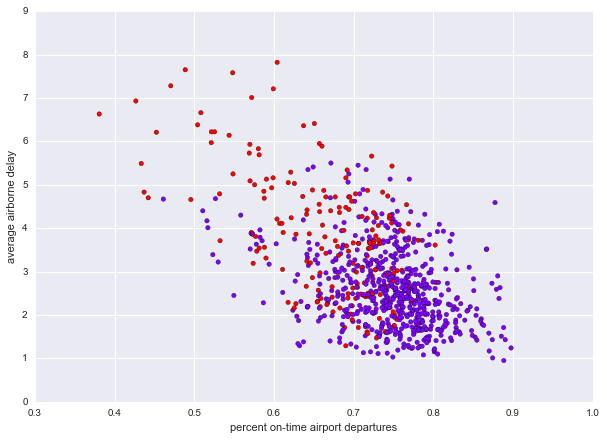

In [35]:
max_dist = 2.5*10**6
clusters = fcluster(Z, max_dist, criterion = 'distance')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(ap_merge['percent on-time airport departures'],ap_merge['average airborne delay'],c=clusters, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='percent on-time airport departures', ylabel='average airborne delay')
plt.show()

Although results colors are flipped, it shows a surprisingly similar result comparing to KMeans.

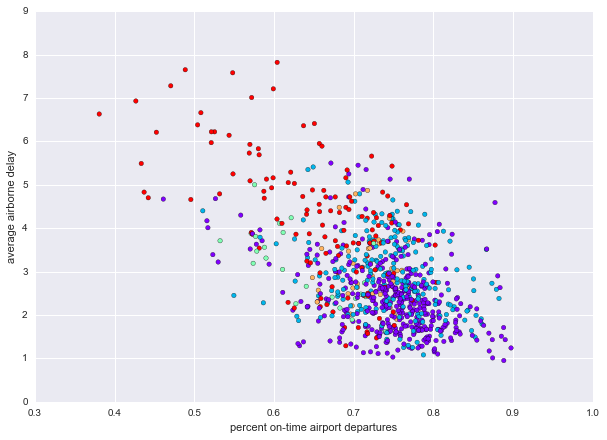

In [37]:
max_dist = .9*10**6
clusters = fcluster(Z, max_dist, criterion = 'distance')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(ap_merge['percent on-time airport departures'],ap_merge['average airborne delay'],c=clusters, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='percent on-time airport departures', ylabel='average airborne delay')
plt.show()

Using a lower maximum distance we can tell tell that the clusters formed are very different to the ones in KMeans as we can still identify the two major groups with the others hiding amongst them

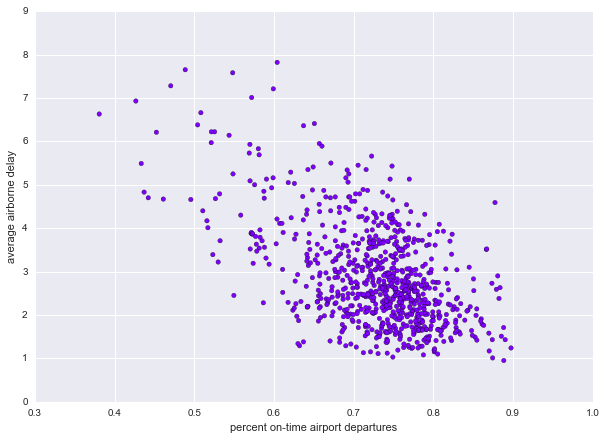

In [42]:
db = DBSCAN(eps= 1, min_samples= 30)  
model = db.fit(ap_X)
labels = db.labels_
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(ap_merge['percent on-time airport departures'],ap_merge['average airborne delay'],c=labels, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='percent on-time airport departures', ylabel='average airborne delay')
plt.show()

After tweaking some parameters I still cannot get DBScan to cluster. One of the reasons why is that the distance between points in different dimensions vary a lot and it is difficult to get a good tune without scaling features

#### 4.5 How can you improve your overall analysis? 

Apply feature scaling to balance feature weights (effectively) and PCA to reduce dimension could be a good way to go

### Part 5: Perform a PCA and Present Findings

In [95]:
# Since over 5000 features are too large and the binary features might not be that infomative. Will work on standardised numeric features from now
from sklearn.preprocessing import StandardScaler
target = ap_X.loc[:,:'average gate arrival delay']
std_ap = pd.DataFrame(StandardScaler().fit_transform(target), columns=list(target.columns))


In [96]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(std_ap)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

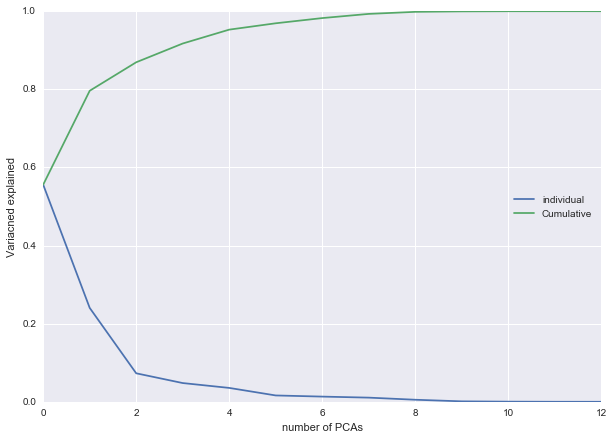

In [103]:
pca_X = pca.transform(std_ap)
exp_var_ratio = pca.explained_variance_ratio_
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(range(len(exp_var_ratio)),exp_var_ratio, label = 'individual')
ax.plot(range(len(exp_var_ratio)),np.cumsum(exp_var_ratio), label='Cumulative')

ax.set(xlabel='number of PCAs', ylabel='Variacned explained')
plt.legend(loc='center right')
plt.show()

In [105]:
pca = PCA(n_components=4)
pca.fit(std_ap)
pca_ap = pca.transform(std_ap)
pca_ap[:5]

array([[-2.43178813,  0.17825073, -0.08939589,  0.25391192],
       [-2.89717333, -0.08344255, -0.04603988,  0.23042053],
       [-2.23583178,  0.55510402,  0.05970183, -0.08417442],
       [-1.66759998,  0.49699476, -0.01208022, -0.51358478],
       [-2.33747726,  0.24191664,  0.04357828, -0.31173214]])

Then we try to reapply clusterings to the PCs.

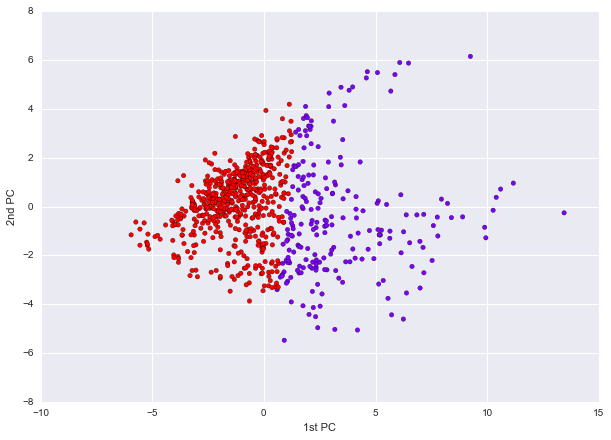

In [144]:
clus = KMeans(n_clusters=2)
clus.fit(pca_ap)
labels = clus.labels_
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(pca_ap[:,0],pca_ap[:,1],c=labels, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='1st PC', ylabel='2nd PC')
plt.show()

In [146]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_ap, clus.labels_, metric='euclidean')

0.40571563290360135

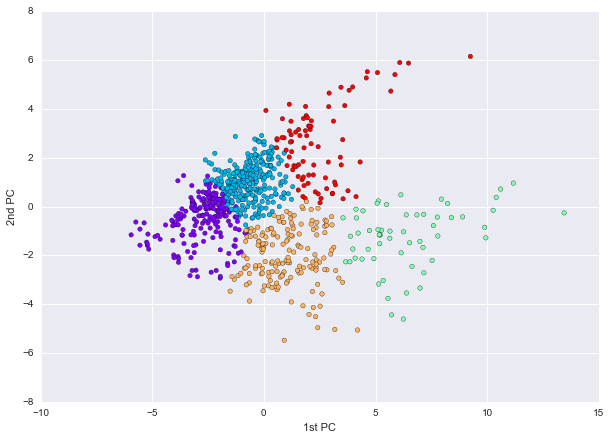

In [109]:
clus = KMeans(n_clusters=5)
clus.fit(pca_ap)
labels = clus.labels_
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(pca_ap[:,0],pca_ap[:,1],c=labels, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='1st PC', ylabel='2nd PC')
plt.show()

It is very obvious that with 2 PCs we can visually distinguish between clusters and this is because over 85% of the variance are already explained in those PCs

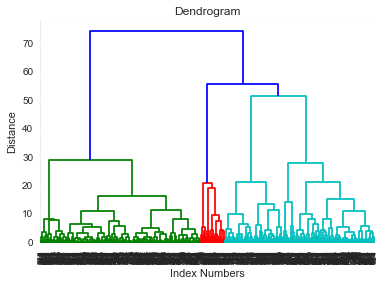

In [147]:
Z = linkage(pca_ap, 'ward')
c, coph_dists = cophenet(Z, pdist(pca_ap))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,)
plt.show()

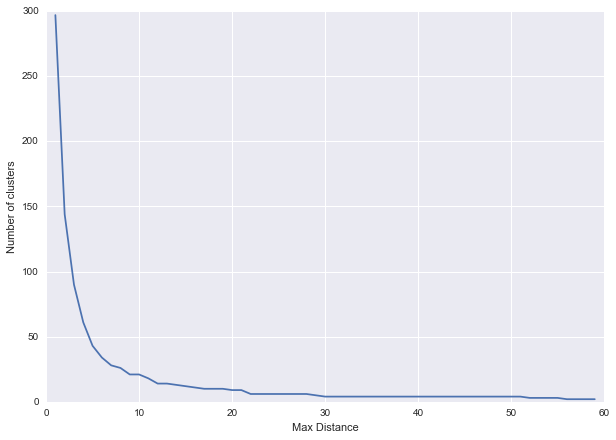

In [148]:
clus_num = []
for i in range(1,60):
    clusters = fcluster(Z, i, criterion='distance')
    n_clus = len(np.unique(clusters))
    clus_num.append(n_clus)
plt.figure(figsize=(10,7))
plt.plot(range(1,60), clus_num)
plt.xlabel('Max Distance')
plt.ylabel('Number of clusters')
plt.show()

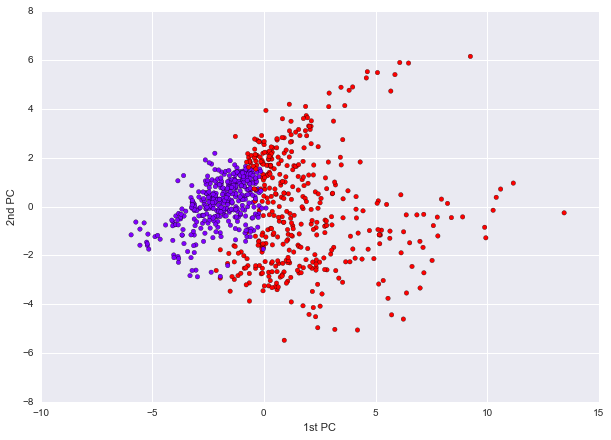

In [149]:
max_dist = 65
clusters = fcluster(Z, max_dist, criterion = 'distance')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(pca_ap[:,0],pca_ap[:,1],c=clusters, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='1st PC', ylabel='2nd PC')
plt.show()

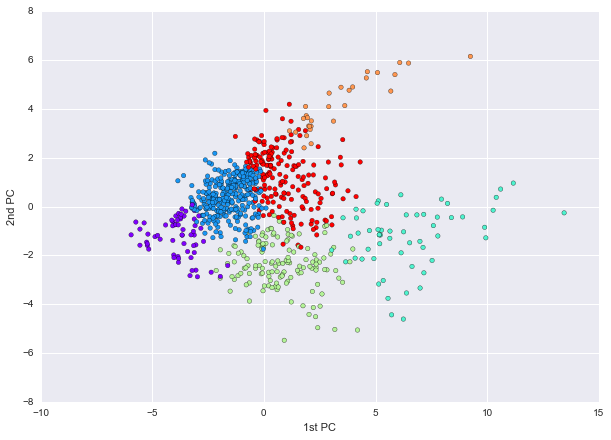

In [150]:
max_dist = 28
clusters = fcluster(Z, max_dist, criterion = 'distance')
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(pca_ap[:,0],pca_ap[:,1],c=clusters, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='1st PC', ylabel='2nd PC')
plt.show()

Again the plots are more interpretable

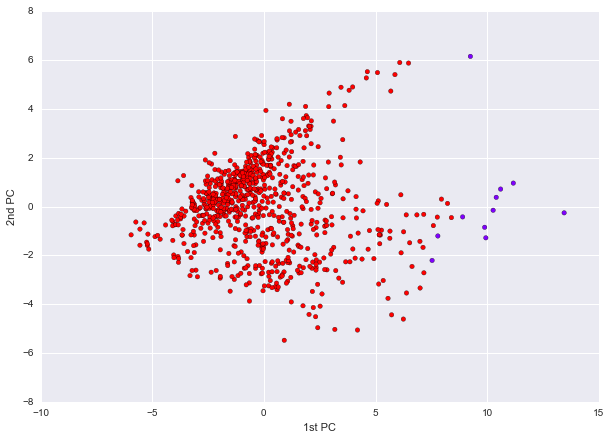

In [171]:
db = DBSCAN(eps= 3, min_samples= 20)  
model = db.fit(pca_ap)
labels = db.labels_
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(pca_ap[:,0],pca_ap[:,1],c=labels, cmap=cm.get_cmap('rainbow'))
ax.set(xlabel='1st PC', ylabel='2nd PC')
plt.show()

By tweaking the parameters we are able to distinguish a few airports and years that are different from the others

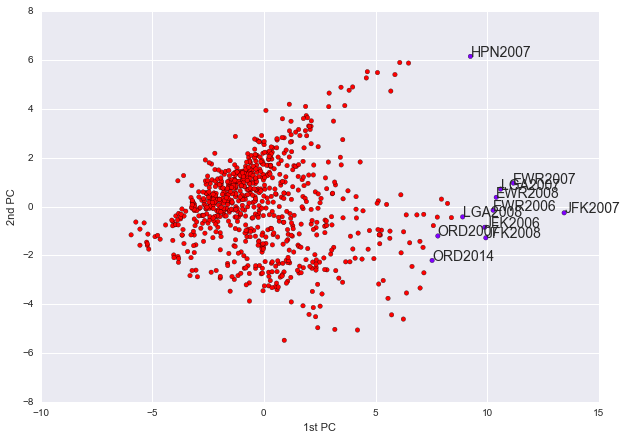

In [172]:
apyr = pd.DataFrame(ap_merge['Airport']+ ap_merge['Year'].astype(str),columns=['Airport & Year'])
applt = pd.concat([std_ap,apyr],axis=1)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(pca_ap[:,0],pca_ap[:,1],c=labels, cmap=cm.get_cmap('rainbow'))
for i, apyr in enumerate(applt['Airport & Year']):
    if labels[i]<0:
        ax.annotate(apyr, (pca_ap[i,0],pca_ap[i,1]),fontsize=14)
ax.set(xlabel='1st PC', ylabel='2nd PC')
plt.show()

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied

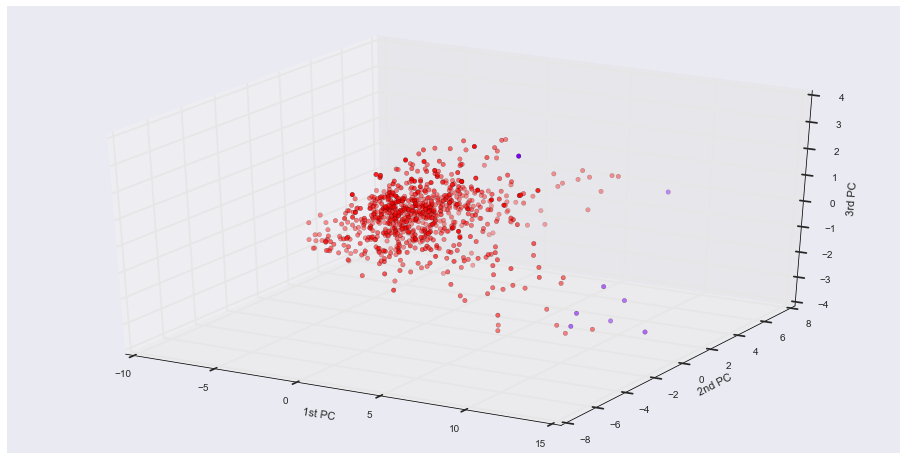

In [139]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_ap[:,0],pca_ap[:,1],pca_ap[:,2],  c= labels, cmap='rainbow')
ax.set(xlabel='1st PC', ylabel='2nd PC', zlabel='3rd PC')
plt.show()

## Project Summary

### Introduction, problem and goal

There are many flight journey made everyday around the world. In order to provide an excellent travelling experience to the customers, airlines need to ensure their operations are smooth and of good quality. One of the key metrics in determining the quality of an operator is its on-time performance. There are many factors that can affect a flight's on time performace such as weather, emergency maintenance and even the delaying of previous flights. Therefore the analysis of aircraft delays are always of interest in the perspectives of operators.

The aim of this project is to deepen the understanding of aircraft or airport delays delays. More specifically it is aim to find out whether all airports behave similarly or are there special ones that worths looking further into.

Success criteria: Identify airports that are significantly different from others


### Obtaining the data

The data is stored in csv files. However in order for other stakeholders namely the FAA to gain easy access, they are transfored into Posgre Database tables and stored on the local machine for now. When the analysis is completed the datasets will be hosted on a AWS server

### EDA and data cleaning

From EDA it is found out that:
- Only the airport contains missing values
- Airport data contains data for more airports than the other 2 (operations and cancellations)
- Tredns in the operations datasets are very obvious with positive correlations between delays variables and and negative correlations between delay and on-time variables.
- Most variables are positively skewd apart from the on-time performance indicators. However it should be noted that their measuring methods and hence units are different

Since there are a lot of categorical variables thay are all transformed into dummy variables for the input in various machine learning algorithm. However this creates a large dimension dataset with over 5000 columns. This could be problematic for slower pcs to handle. Therefore it is suggestted to do PCAs with scaled features 

The final data set is prepared by performing inner joins between the 3 data sets so we can make sure there are no missing values generated during the merge.


### Models

There were 3 clustering methods applied to the dataset. They are:

- KMeans
- Hierachical
- DBScan

First the raw dataset is passed into each algorithm and tested. Then the resuls are plotted on axis which I believe clusters may appear according to the EDA pairplot. (Admittedly this is not the most scientific procedure). However Keans with 2 clusters were able to perform reasonably well in terms of vision. The Silhouette Score is about 0.66 which shows it is not too bad. Matching with the visual results, it can be said that the points within clusters are rather close together but the cluster themselves are close together. 

The Hierachical clustering was attempted and it provids a very similar result to KMeans when we set the thresohold to produce 2 clusters. However it performs slightly better (visually) when the number of clusters are increased. 

Next DBScan was attempted and no clusters can be generated. The major cause of this situation is that the features are not scaled and variables can have huge ranges which severely affects DBS which is a mehtod relying heavily on space profiles. Therefore feature scaling and PCA was carried out.

After scaled the features, it is decided that the binary variables add little to the analysis so they were dropped. Then there are 12 PCs remained. The PCA is rather effective with 3 components explaining over 85% of the variance. 
The clustering methods were then ran with the PCs and significantly better results were obtained. Since the PCs were able to explain most of the variance it helped in visualising the clusters much better. However the Silhoutte Score of KMeans reduced to just above 0.4 which might suggest the groups got closer. Hierachical clustering resulted in obvious clusters as well.

Using DBScan and tuning the parameters, it is found out that there are some airports which are significantly different from the others. Parameters used are (min_samples = 20 and exp = 3). 


### Conclusion and future work

It can be said that this analysis is a success because we were able to find out outlier aiports for further investigations. Thosee airports were identified by applying DBScan method and are found out that they were not situated near to the main group in terms of PC distances. Those airports are:

- JFK 2006,2007,2008
- EWR 2006,2007,2008
- LGA 2007,2008
- ORD 2007,2014
- HPN 2007

Further investigations using the airport cancellation and operations datasets are recommended.

